In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.svm import SVR
import os
from sys import platform
import seaborn as sns

Load the train.csv file
Explore the data, understand it
Process it for future training
Do train, test, split for your train.csv file
fit/train a model from your cleaned_train_df

In [2]:
df_train = pd.read_csv("data/train.csv")
df_test = pd.read_csv("data/test.csv")

In [3]:
df_train.sample()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
1136,1136,1.01,Good,F,VS2,63.1,59.0,6.31,6.37,4.0,8.669


In [4]:
df_test.sample()

,id,carat,cut,color,clarity,depth,table,x,y,z
11069,11069,0.71,Ideal,G,VS1,61.4,56.0,5.76,5.73,3.53


In [5]:
df_train.shape

(40455, 11)

In [6]:
df_test.shape

(13485, 10)

In [7]:
print(df_train.shape[0])
df_train.sample()

40455


,id,carat,cut,color,clarity,depth,table,x,y,z,price
32774,32774,0.36,Ideal,E,VS2,61.9,56.0,4.56,4.59,2.83,6.671


In [8]:
print(df_test.shape[0])
df_test.sample()

13485


,id,carat,cut,color,clarity,depth,table,x,y,z
3097,3097,1.0,Very Good,H,SI2,60.8,60.0,6.44,6.49,3.93


In [9]:
df_train.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [10]:
df_train.cut.value_counts()

cut
Ideal        16210
Premium      10296
Very Good     9080
Good          3673
Fair          1196
Name: count, dtype: int64

In [11]:
df_train.color.value_counts()

color
G    8530
E    7352
F    7168
H    6232
D    5102
I    3984
J    2087
Name: count, dtype: int64

In [12]:
df_train.clarity.value_counts()

clarity
SI1     9861
VS2     9196
SI2     6844
VS1     6073
VVS2    3848
VVS1    2729
IF      1367
I1       537
Name: count, dtype: int64

In [13]:
df_train.cut.value_counts()

cut
Ideal        16210
Premium      10296
Very Good     9080
Good          3673
Fair          1196
Name: count, dtype: int64

In [14]:
df_train_num=df_train.select_dtypes(exclude='object')

In [15]:
df_train_num.drop(['z'], axis=1, inplace=True)

In [16]:
df_train_num.drop(['x'], axis=1, inplace=True)

In [17]:
df_train_num.drop(['y'], axis=1, inplace=True)

<Axes: >

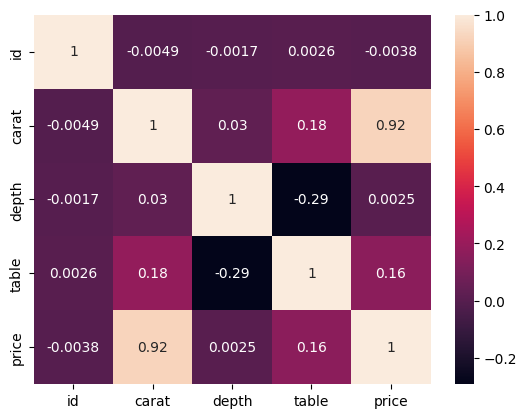

In [18]:
sns.heatmap(df_train_num.corr(), annot=True)

In [19]:
df_train.cut.value_counts()

cut
Ideal        16210
Premium      10296
Very Good     9080
Good          3673
Fair          1196
Name: count, dtype: int64

In [20]:
cut_dict = {'Ideal': 5, 
        'Premium': 4, 
        'Very Good': 3, 
        'Good': 2, 
        'Fair': 1 }

In [21]:
df_train["transformed_cut"] = df_train.cut.replace(cut_dict)

In [22]:
df_train.drop(columns="cut", inplace=True)

In [23]:
df_train.color.value_counts()

color
G    8530
E    7352
F    7168
H    6232
D    5102
I    3984
J    2087
Name: count, dtype: int64

In [24]:
color_dict = {'D': 7, 
              'E': 6, 
              'F': 5, 
              'G': 4, 
              'H': 3,
             'I': 2,
             'J': 1}

In [25]:
df_train["transformed_color"] = df_train.color.replace(color_dict)

In [26]:
df_train.drop(columns="color", inplace=True)

In [27]:
df_train.clarity.value_counts()

clarity
SI1     9861
VS2     9196
SI2     6844
VS1     6073
VVS2    3848
VVS1    2729
IF      1367
I1       537
Name: count, dtype: int64

In [28]:
clarity_dict = {'IF': 8, 
              'VVS1': 7, 
              'VVS2': 6, 
              'VS1': 5, 
              'VS2': 4,
             'SI1': 3,
             'SI2': 2,
               'I1' : 1}

In [29]:
df_train['transformed_clarity'] = df_train.clarity.replace(clarity_dict)

In [30]:
df_train.drop(columns="clarity", inplace=True)

<Axes: >

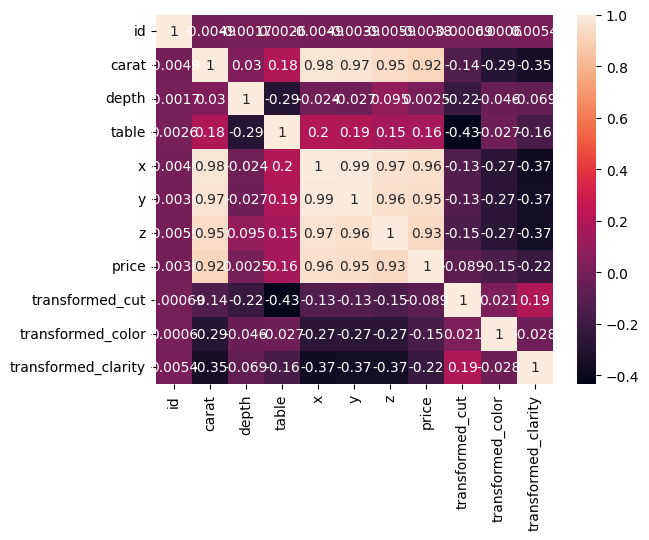

In [31]:
sns.heatmap(df_train.corr(), annot=True)

In [32]:
#La calidad de la gema, las condiciones del mercado, y el margen del vendedor. En este punto nos referimos a las conocidas 
#como 4Cs, (Carat, Color, Clarity, Cut) que traducido al español serían el peso, el color, la pureza y la talla.

In [33]:
df_train

,id,carat,depth,table,x,y,z,price,transformed_cut,transformed_color,transformed_clarity
0,0,1.02,63.2,58.0,6.36,6.40,4.03,8.928,2,7,4
1,1,0.35,61.0,57.0,4.54,4.57,2.77,6.477,3,3,6
2,2,0.31,60.5,58.0,4.43,4.40,2.67,6.810,4,3,7
3,3,0.38,61.4,56.0,4.66,4.69,2.87,6.824,5,6,5
4,4,1.64,61.8,56.0,7.59,7.60,4.69,9.776,5,4,6
...,...,...,...,...,...,...,...,...,...,...,...
40450,40450,1.20,62.2,55.0,6.77,6.81,4.23,9.149,5,4,6
40451,40451,1.50,64.2,56.0,7.30,7.09,4.62,9.077,2,3,5
40452,40452,1.06,61.9,55.0,6.54,6.58,4.06,8.892,5,6,4
40453,40453,0.31,60.1,58.0,4.40,4.38,2.64,6.385,4,7,2


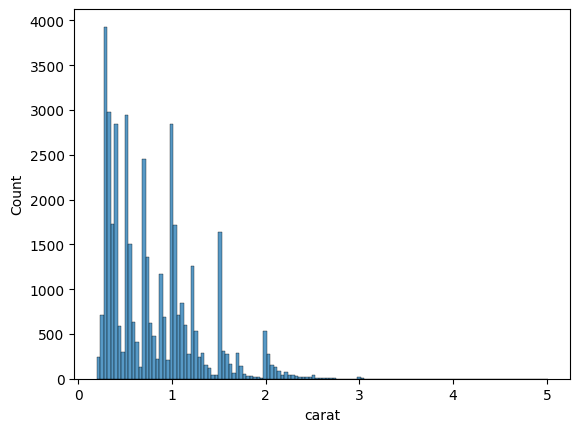

In [34]:

sns.histplot(x="carat", data=df_train);

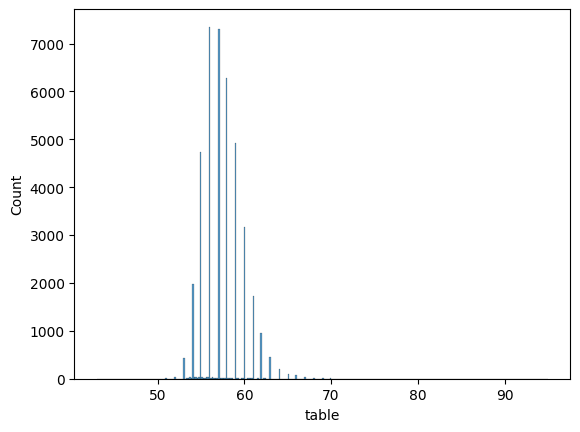

In [35]:
sns.histplot(x="table", data=df_train);

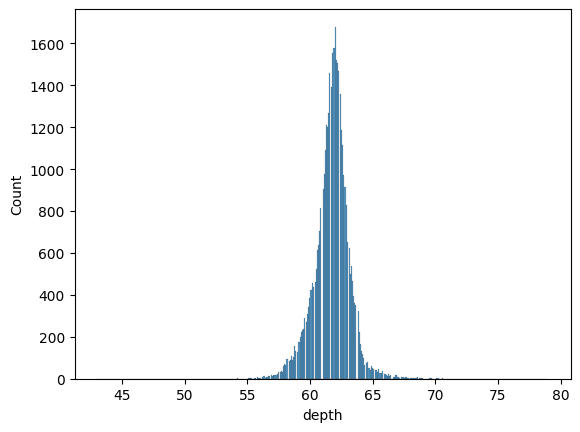

In [36]:
sns.histplot(x="depth", data=df_train);

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
scaler = StandardScaler()

In [39]:
df_train["table_scaled"] = scaler.fit_transform(df_train["table"].values.reshape(-1, 1))

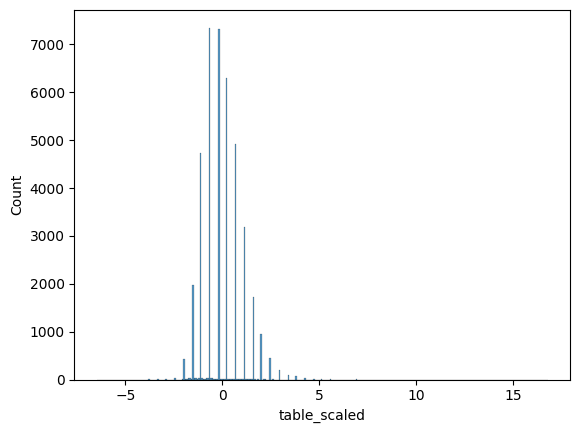

In [40]:
sns.histplot(x="table_scaled", data=df_train);

In [41]:
df_train["depth_scaled"] = scaler.fit_transform(df_train["depth"].values.reshape(-1, 1))

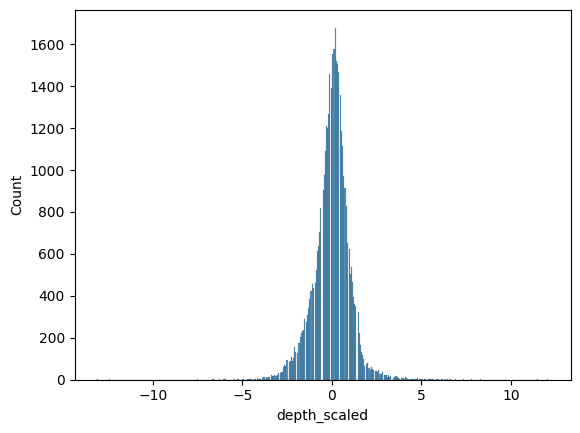

In [42]:
sns.histplot(x="depth_scaled", data=df_train);

In [43]:
from sklearn.preprocessing import MinMaxScaler

In [44]:
min_max_scaler = MinMaxScaler()

In [45]:
df_train["carat_normalized"] = min_max_scaler.fit_transform(df_train["carat"].values.reshape(-1, 1))

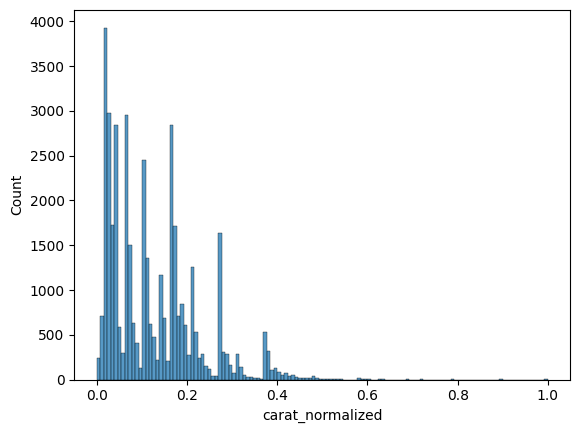

In [46]:
sns.histplot(x="carat_normalized", data=df_train);

In [47]:
df_train.drop(columns= ["carat", "depth", 'table'], inplace=True)

In [48]:
df_train1 = df_train[['id','price','transformed_cut','transformed_color','transformed_clarity','table_scaled','depth_scaled',
                      'carat_normalized']]

In [49]:
df_train.sample()

,id,x,y,z,price,transformed_cut,transformed_color,transformed_clarity,table_scaled,depth_scaled,carat_normalized
6702,6702,7.58,7.6,4.67,9.695,5,4,5,-0.203622,-0.174317,0.297297


In [50]:
df_train1.sample()

,id,price,transformed_cut,transformed_color,transformed_clarity,table_scaled,depth_scaled,carat_normalized
2244,2244,6.163,5,5,3,-1.544948,0.385892,0.02079


In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X = df_train1.drop(["price", "id"], axis=1)
y = df_train1.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)


if platform == "darwin":
    os.system("say I'm done training")

y_pred = regressor.predict(X_test)
np.sqrt(mean_squared_error(y_pred, y_test))

0.2836965873459628

In [53]:
df_train1

,id,price,transformed_cut,transformed_color,transformed_clarity,table_scaled,depth_scaled,carat_normalized
0,0,8.928,2,7,4,0.243487,1.016128,0.170478
1,1,6.477,3,3,6,-0.203622,-0.524447,0.031185
2,2,6.810,4,3,7,0.243487,-0.874578,0.022869
3,3,6.824,5,6,5,-0.650731,-0.244343,0.037422
4,4,9.776,5,4,6,-0.650731,0.035762,0.299376
...,...,...,...,...,...,...,...,...
40450,40450,9.149,5,4,6,-1.097839,0.315866,0.207900
40451,40451,9.077,2,3,5,-0.650731,1.716389,0.270270
40452,40452,8.892,5,6,4,-1.097839,0.105788,0.178794
40453,40453,6.385,4,7,2,0.243487,-1.154683,0.022869


In [54]:
df_test.sample()

,id,carat,cut,color,clarity,depth,table,x,y,z
10885,10885,0.31,Premium,H,VVS2,61.2,60.0,4.39,4.37,2.68


In [55]:
df_test["transformed_cut"] = df_test.cut.replace(cut_dict)
df_test.drop(columns="cut", inplace=True)

In [56]:
df_test["transformed_color"] = df_test.color.replace(color_dict)
df_test.drop(columns="color", inplace=True)

In [57]:
df_test["transformed_clarity"] = df_test.clarity.replace(clarity_dict)
df_test.drop(columns="clarity", inplace=True)

In [58]:
df_test.sample()

,id,carat,depth,table,x,y,z,transformed_cut,transformed_color,transformed_clarity
5460,5460,1.16,64.0,58.0,6.56,6.63,4.22,2,3,3


In [59]:
df_test.columns

Index(['id', 'carat', 'depth', 'table', 'x', 'y', 'z', 'transformed_cut',
       'transformed_color', 'transformed_clarity'],
      dtype='object')

In [60]:
df_test["table_scaled"] = scaler.fit_transform(df_test["table"].values.reshape(-1, 1))
df_test["depth_scaled"] = scaler.fit_transform(df_test["depth"].values.reshape(-1, 1))
df_test["carat_normalized"] = min_max_scaler.fit_transform(df_test["carat"].values.reshape(-1, 1))
df_test.drop(columns= ["carat", "depth", 'table'], inplace=True)

In [72]:
df_test = df_test[['id','transformed_cut','transformed_color','transformed_clarity','table_scaled','depth_scaled',
                      'carat_normalized']]

In [62]:
df_train1.sample()

,id,price,transformed_cut,transformed_color,transformed_clarity,table_scaled,depth_scaled,carat_normalized
6881,6881,6.39,5,4,4,-1.097839,-0.454421,0.029106


In [73]:
df_test.sample()

,id,transformed_cut,transformed_color,transformed_clarity,table_scaled,depth_scaled,carat_normalized
824,824,5,7,4,-0.207567,-0.035144,0.089059


In [75]:
y_pred = regressor.predict(df_test.drop('id', axis=1))
y_pred

# Just for feedback
if platform == "darwin":
    os.system("say -v Monica ayam don predictin")

In [77]:
print(df_test.shape[0])
df_test.sample()

13485


,id,transformed_cut,transformed_color,transformed_clarity,table_scaled,depth_scaled,carat_normalized
11202,11202,3,1,2,2.485334,-0.795742,0.572519


In [78]:
df_test['price'] = y_pred
df_for_submission = df_test[["id", "price"]]

In [79]:
print(df_for_submission.shape[0])
df_for_submission.sample()

13485


,id,price
3843,3843,6.733586


In [80]:
df_for_submission.to_csv("my_submission.csv", index=False)


# Just for feedback
if platform == "darwin":
    os.system("say redi for submission")

In [81]:
df_for_submission.head()

,id,price
0,0,8.283850
1,1,7.091296
2,2,7.063989
3,3,8.944917
4,4,7.193104
